In [31]:
import numpy as np
import AR
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["axes.labelpad"] = -1.7


# フーリエ変換

In [37]:
amplitude

array([25.22143923,  5.30094917,  5.30094917])

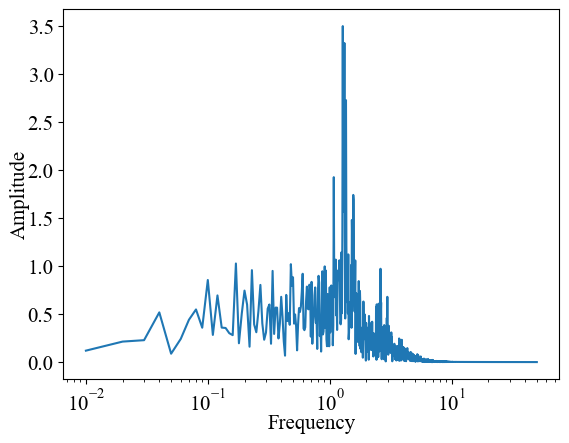

In [38]:
fname = "../lorenz/lorenz100sec100000dump_dt=0.01sigma10rho28beta2.66667.npy"
data =  np.load(fname)[2, :]
N = len(data)
dt = 0.01
#ナイキストの定理より上限を設定
sup = 1/(2*dt)

# 横軸に周期、縦軸に振幅を持つグラフの作成とプロット
data_fft = np.fft.fft(data)
freq = np.fft.fftfreq(N, dt) # 周波数
amplitude = np.abs(data_fft/(N/2)) # 振幅
# グラフの作成
plt.plot(freq[1:int(N/2)], amplitude[1:int(N/2)])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xscale("log")
plt.show()

In [74]:
1/max(abs(amplitude[1:int(N/2)]))

0.15171854545811214

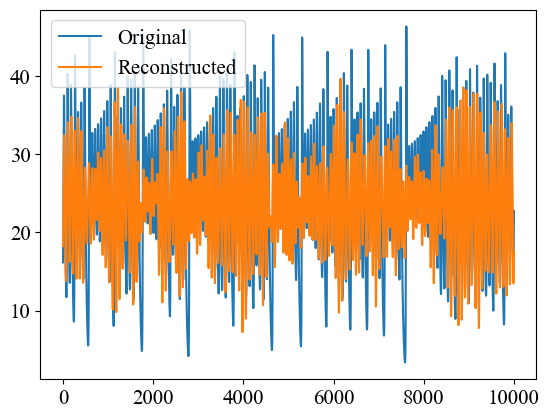

In [39]:
# 振幅の大きいところはそのまま、小さいところは0にしてフーリエ逆変換
amp_threshold = 1
result = data_fft.copy()
result[amplitude < amp_threshold] = 0
reconstructed = np.real(np.fft.ifft(result))

# 時系列データのプロット
plt.plot(data, label="Original")
plt.plot(reconstructed, label="Reconstructed")
# plt.plot(np.real(np.fft.ifft(data_fft)), label="Reconstructed")
plt.legend()
plt.show()

In [ ]:
# 

# 線型回帰で選んだ周波数から概周期関数を作成する

In [42]:
a = freq[amplitude > amp_threshold]

In [41]:
# a[0]からa[23]までのから２つを選ぶ組み合わせを全て求め、　その比を求める
r = []
for i in range(len(a)):
    for j in range(i+1, len(a)):
        r.append(a[i]/a[j])
r

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.3541666666666667,
 0.15740740740740738,
 0.15178571428571427,
 0.14166666666666666,
 0.136,
 0.13385826771653545,
 0.1328125,
 0.1317829457364341,
 0.13076923076923078,
 0.1297709923664122,
 0.12878787878787878,
 0.12781954887218044,
 0.1259259259259259,
 0.125,
 0.1240875912408759,
 0.11971830985915494,
 0.11333333333333334,
 0.1118421052631579,
 0.1111111111111111,
 0.10897435897435898,
 0.10828025477707007,
 0.10759493670886076,
 0.10493827160493827,
 -0.10493827160493827,
 -0.10759493670886076,
 -0.10828025477707007,
 -0.10897435897435898,
 -0.1111111111111111,
 -0.1118421052631579,
 -0.11333333333333334,
 -0.11971830985915494,
 -0.1240875912408759,
 -0.125,
 -0.1259259259

In [168]:
data_fft

array([119986.22138515+0.j,      0.        +0.j,      0.        +0.j, ...,
            0.        +0.j,      0.        +0.j,      0.        +0.j])

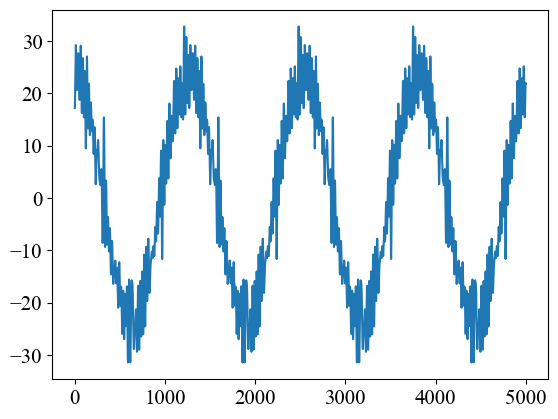

In [167]:
freq_result = freq[np.array(amplitude > amp_threshold, dtype=bool)][1:]
amplitude_result = amplitude[np.array(amplitude > amp_threshold, dtype=bool)][1:]
dt = 0.01

data_tr = data

reconstructed2 = np.zeros_like(np.arange(start, start+sec, dt)).astype(complex)

for i in range(len(freq_result)):
    reconstructed2 += result[i]*np.exp(2*np.pi*1j*freq_result[i]*np.arange(start, start+sec, dt)) / N
    
plt.plot(np.real(reconstructed2), label="Reconstructed")